### One specific scenario

{'RecoveryPeriod': {'StartDate': '06/09/24', 'StartTime': '7:00', 'EndDate': '06/09/24', 'EndTime': '20:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
2024-09-06 07:00:00


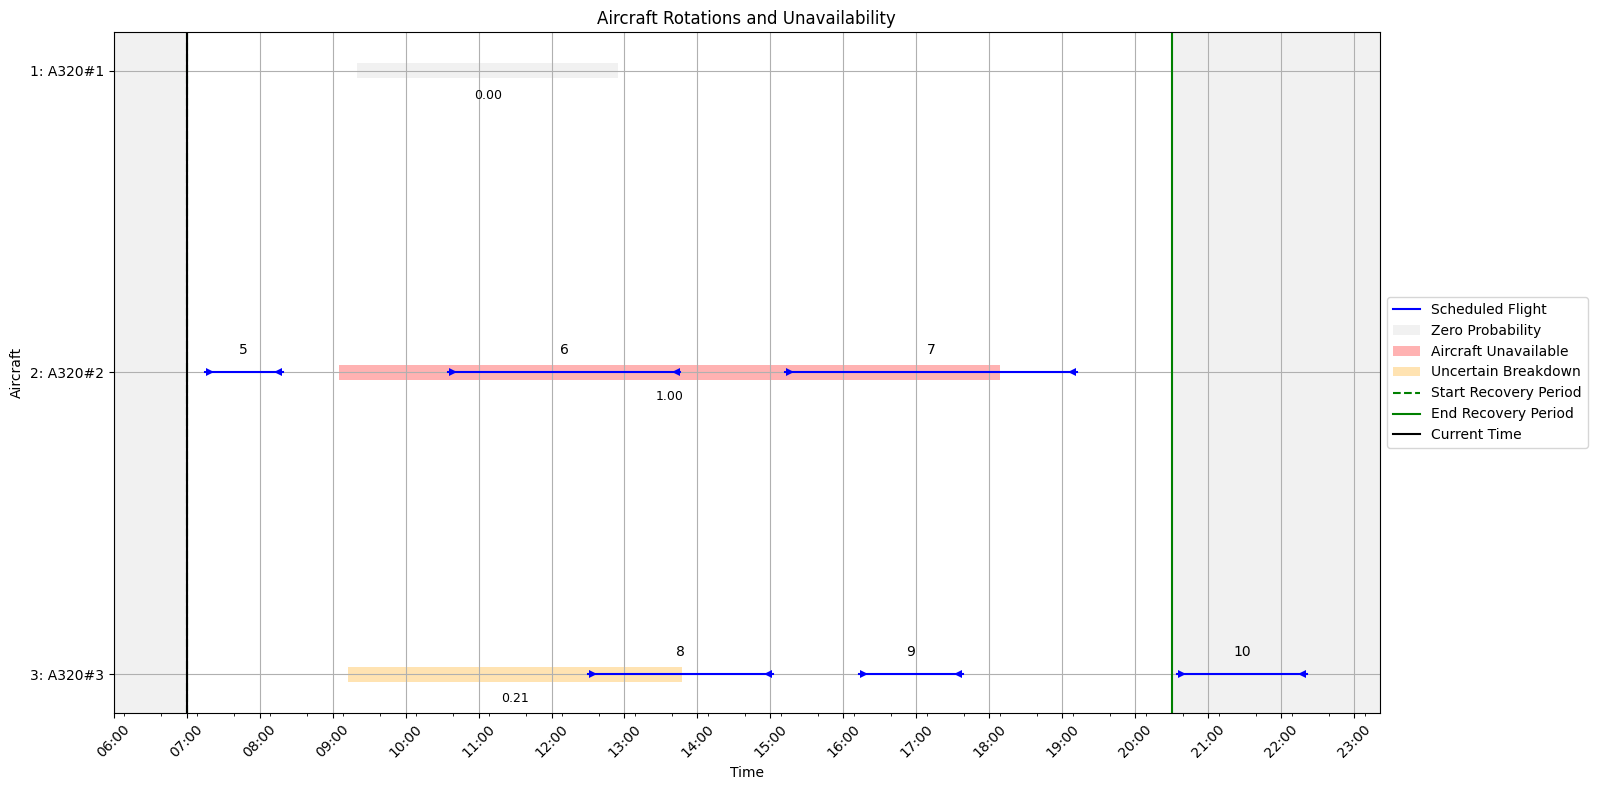

In [1]:
from scripts.visualizations import StatePlotter
from scripts.utils import load_scenario_data
import os
from src.environment import AircraftDisruptionEnv
from datetime import datetime

env_type = 'myopic'

# Set the scenario and root folder
data_root_folder = "../data/Training/3ac-single-cleared/"
scenario_name = 'Scenario_01'

# Verify that the scenario exists
if not os.path.exists(data_root_folder + scenario_name):
    raise FileNotFoundError('The scenario does not exist at ', data_root_folder + scenario_name)

# Run the visualization for the scenario
data_dict = load_scenario_data(data_root_folder + scenario_name)

# Extract necessary data for the environment
aircraft_dict = data_dict['aircraft']
flights_dict = data_dict['flights']
rotations_dict = data_dict['rotations']
alt_aircraft_dict = data_dict['alt_aircraft']
config_dict = data_dict['config']

print(config_dict)

# Initialize the environment
env = AircraftDisruptionEnv(aircraft_dict, flights_dict, rotations_dict, alt_aircraft_dict, config_dict,  env_type=env_type)


# Create StatePlotter object for visualizing the environment state
state_plotter = StatePlotter(
    aircraft_dict=env.aircraft_dict,
    flights_dict=env.flights_dict,
    rotations_dict=env.rotations_dict,
    alt_aircraft_dict=env.alt_aircraft_dict,
    start_datetime=env.start_datetime,
    end_datetime=env.end_datetime,
    uncertain_breakdowns=env.uncertain_breakdowns,
)



# Define the recovery period based on provided configuration
start_date = config_dict['RecoveryPeriod']['StartDate']
start_time = config_dict['RecoveryPeriod']['StartTime']
end_date = config_dict['RecoveryPeriod']['EndDate']
end_time = config_dict['RecoveryPeriod']['EndTime']
start_datetime = datetime.strptime(f"{start_date} {start_time}", '%d/%m/%y %H:%M')

#  def plot_state(self, flights_dict, swapped_flights, environment_delayed_flights, cancelled_flights, current_datetime):
# Create the plotter object
print(env.current_datetime)
state_plotter.plot_state(flights_dict, [], [], set(), env.current_datetime)


### A whole folder (like the training set)

Aircraft Rotations for ../data/Training/3ac-single-cleared/Scenario_01


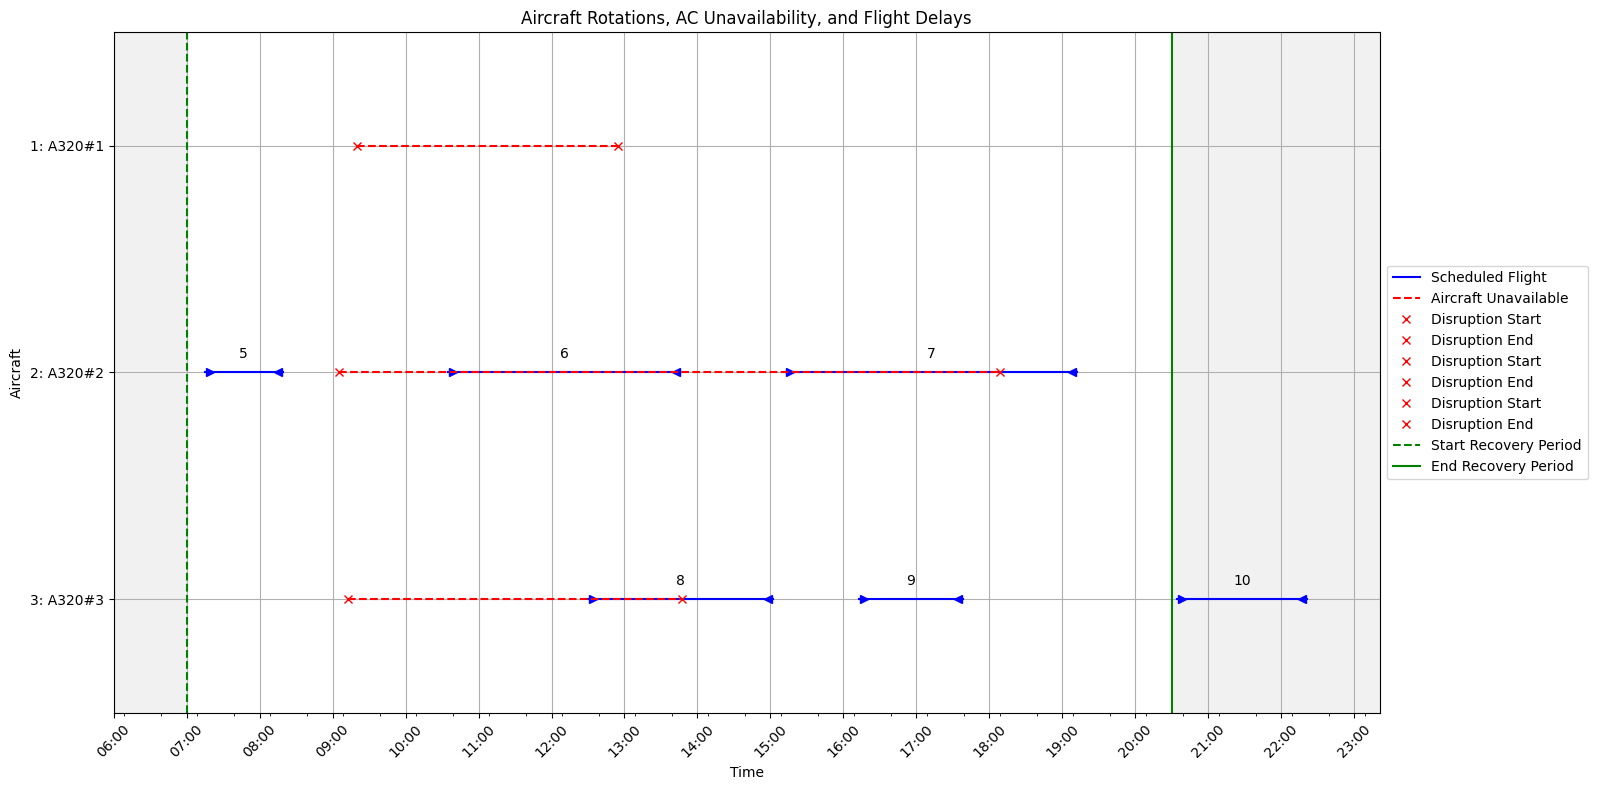

In [2]:
from scripts.visualizations import run_visualization
import os

# Set the scenario and root folder
data_root_folder = "../data/Training/3ac-single-cleared/"


# Verify that the folder exists
if not os.path.exists(data_root_folder):
    raise FileNotFoundError('The folder does not exist at ', data_root_folder)

scenario_names = list(os.listdir(data_root_folder))
scenario_names.sort()

# Run the visualization for all scenarios
for scenario_name in scenario_names:
    if os.path.isdir(data_root_folder + scenario_name):
        run_visualization(scenario_name, data_root_folder, aircraft_rotations=True, airport_rotations=False)